In [1]:
import pandas as pd
data = pd.read_csv('mammography.csv', names = ["0","1","2","3","4","5","6"])
data

,0,1,2,3,4,5,6
0,-0.5378,-0.3640,5.3141,-0.2190,0.2685,1.1080,0
1,-0.7844,-0.4702,-0.5916,-0.8596,-0.3779,-0.9457,0
2,-0.7844,-0.4702,-0.5916,-0.8596,-0.3779,-0.9457,0
3,0.3804,-0.0278,-0.4113,0.7261,3.5478,1.2421,0
4,-0.7844,-0.4702,-0.5916,-0.8596,-0.3779,-0.9457,0
...,...,...,...,...,...,...,...
195,0.0927,-0.2933,-0.2761,0.9303,3.5612,1.2909,1
196,1.2980,-0.1605,-0.5465,1.3253,13.7504,0.9100,1
197,4.3548,0.5826,-0.5465,9.3988,-0.3779,0.4285,1
198,0.5607,-0.3685,-0.2761,4.0645,2.4229,1.3305,1


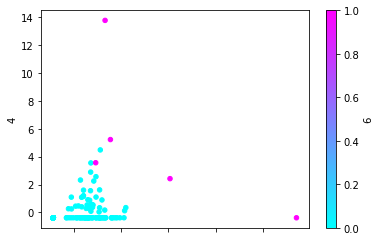

In [2]:
import matplotlib
%matplotlib inline

data.plot.scatter(x= '3' ,y= '4' ,c= '6',colormap='cool')

In [3]:
classes = data['6']
data = data.drop(labels = ['6'], axis = 1)
print('Size of data:', data.shape)
print('Class distribution:')
print(classes.value_counts())

Size of data: (200, 6)
Class distribution:
0    195
1      5
Name: 6, dtype: int64


In [6]:

import numpy as np

centered_data = (data.iloc[:] - data.mean()).values
inv_S = np.linalg.inv(data.cov().values)

S = data.cov()
inv_S = pd.DataFrame(np.linalg.inv(S.values),S.columns,S.index)

Z = np.zeros((centered_data.shape[0], 1))

for i in range(Z.shape[0]):
    Z[i] = np.dot(centered_data[i] , np.dot(inv_S, centered_data[i].T)) 

# Sort the Z-scores and assign the top-5 highest scores as anomalies.

outlier_list = [float(x) for x in sorted(Z, reverse = True)[0:5]]
result = pd.DataFrame()
result['Prediction'] = [1 if x  in outlier_list else 0 for x in Z]
result['Z-Score'] = [x for x in Z]


result



,Prediction,Z-Score
0,0,[38.0578027855086]
1,0,[1.5863775354194394]
2,0,[1.5863775354194394]
3,0,[8.435050371036125]
4,0,[1.5863775354194394]
...,...,...
195,0,[8.03761317604921]
196,1,[122.30688340613163]
197,1,[134.71042443444085]
198,0,[19.813908725601763]


In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('Accuracy =', accuracy_score(classes, result['Prediction']) )
cm = confusion_matrix(classes, result['Prediction'])
pd.DataFrame(cm)

Accuracy = 0.97


,0,1
0,192,3
1,3,2


In [13]:
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
#to get rid of the depreciation warning

clf = IsolationForest(n_estimators=200, max_samples=50, contamination=0.025, 
                      random_state=1)
clf.fit(data.values)
score2 = clf.predict(data.values)
score2
result2 = pd.DataFrame()
result2['Prediction'] = [0 if x == 1 else 1 for x in score2]

result

,Prediction,Z-Score
0,0,[38.0578027855086]
1,0,[1.5863775354194394]
2,0,[1.5863775354194394]
3,0,[8.435050371036125]
4,0,[1.5863775354194394]
...,...,...
195,0,[8.03761317604921]
196,1,[122.30688340613163]
197,1,[134.71042443444085]
198,0,[19.813908725601763]


In [10]:

print('Accuracy =', accuracy_score(classes, result2['Prediction']) )
cm2 = confusion_matrix(classes, result2['Prediction'])
pd.DataFrame(cm2)

Accuracy = 0.98


,0,1
0,193,2
1,2,3


In [12]:
"""
Isolation forest is the better method to use with this dataset. 
It is more accurate at detecting anomalies than using Mahalanobis Distance.
"""

'\nIsolation forest is the better method to use with this dataset. \nIt is more accurate at detecting anomalies than using Mahalanobis Distance.\n'